In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 아래 두 줄은 matplotlib의 기본 scheme말고 seaborn scheme을 세팅해서 일일이 graph의 font size를 지정한 수고를 덜음
plt.style.use('seaborn')
sns.set(font_scale=2.5)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/tmp/ipykernel_32/854519368.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### 해야할 프로세스
1. Dataset 확인
2. 탐색적 데이터 분석(exploratory data analysis) - feature들을 개별적으로 분석하고 상관관계 확인. 시각화로 insight 얻기
3. feature engineering - 모델의 성능을 높일 수 있도록 모델 정의 전에 one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등의 feature engineering하기
4. model 생성 - sklearn을 사용해 모델 만들기, 혹은 tensorflow, pytorch
5. 모델 학습 및 예측 - train set으로 학습, test set으로 예측
6. 모델 평가 - 예측 성능이 원하는 수준인지 판단하기. 문제에 따라 평가 방식이 상이함.

# 1. Dataset 확인
- 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화되어 있고, 많이 쓰이는 라이브러리는 Pandas
- pandas를 사용해 데이터셋의 간단한 통계적 분석부터 복잡한 처리들을 간단한 메소드를 사용해서 해내기

In [3]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 우리가 다루는 문제에서 feature은 Pclass, Age, SibSp, Parch, Fare이며, 예측하려는 target label은 Survived
- Pandas dataframe에는 describe() 메소드가 있는데, 이를 사용하면 각 feature가 가진 통계치들을 반환

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- Null data가 존재하는 열이 있는 것을 짐작할 수 있다.

## 1.1 Null data chech

In [7]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00
column:   Survived	 Percent of NaN value: 0.00
column:     Pclass	 Percent of NaN value: 0.00
column:       Name	 Percent of NaN value: 0.00
column:        Sex	 Percent of NaN value: 0.00
column:        Age	 Percent of NaN value: 19.87
column:      SibSp	 Percent of NaN value: 0.00
column:      Parch	 Percent of NaN value: 0.00
column:     Ticket	 Percent of NaN value: 0.00
column:       Fare	 Percent of NaN value: 0.00
column:      Cabin	 Percent of NaN value: 77.10
column:   Embarked	 Percent of NaN value: 0.22


In [8]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00
column:     Pclass	 Percent of NaN value: 0.00
column:       Name	 Percent of NaN value: 0.00
column:        Sex	 Percent of NaN value: 0.00
column:        Age	 Percent of NaN value: 20.57
column:      SibSp	 Percent of NaN value: 0.00
column:      Parch	 Percent of NaN value: 0.00
column:     Ticket	 Percent of NaN value: 0.00
column:       Fare	 Percent of NaN value: 0.24
column:      Cabin	 Percent of NaN value: 78.23
column:   Embarked	 Percent of NaN value: 0.00


- train, test set에서 Age, Cabin, Embarked에서 null data가 존재하는 것을 볼 수 있다.
- MANO 라는 라이브러리를 사용하면 Null data의 존재를 더 쉽게 볼 수 있다.

<Axes: >

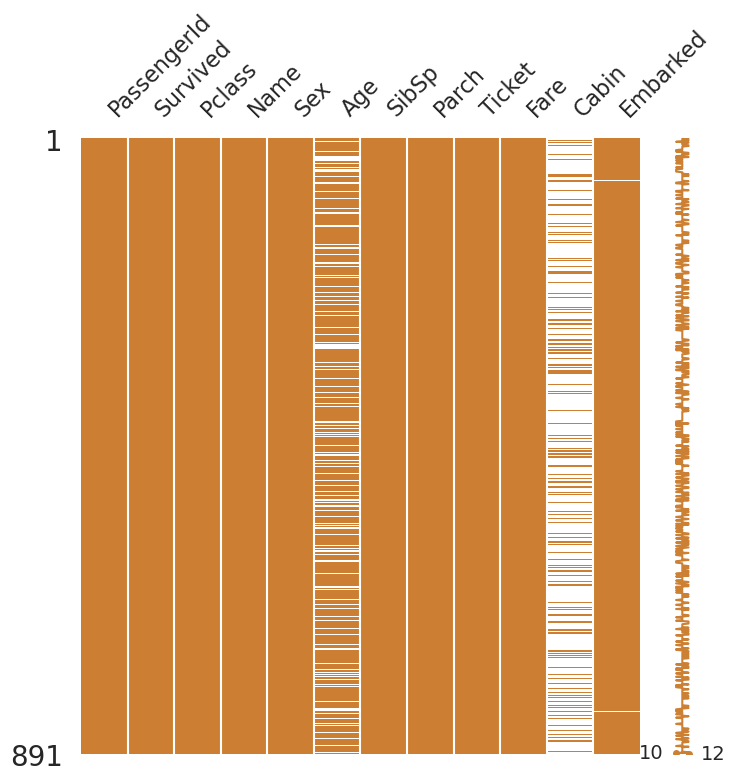

In [9]:
import missingno as msno
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<Axes: >

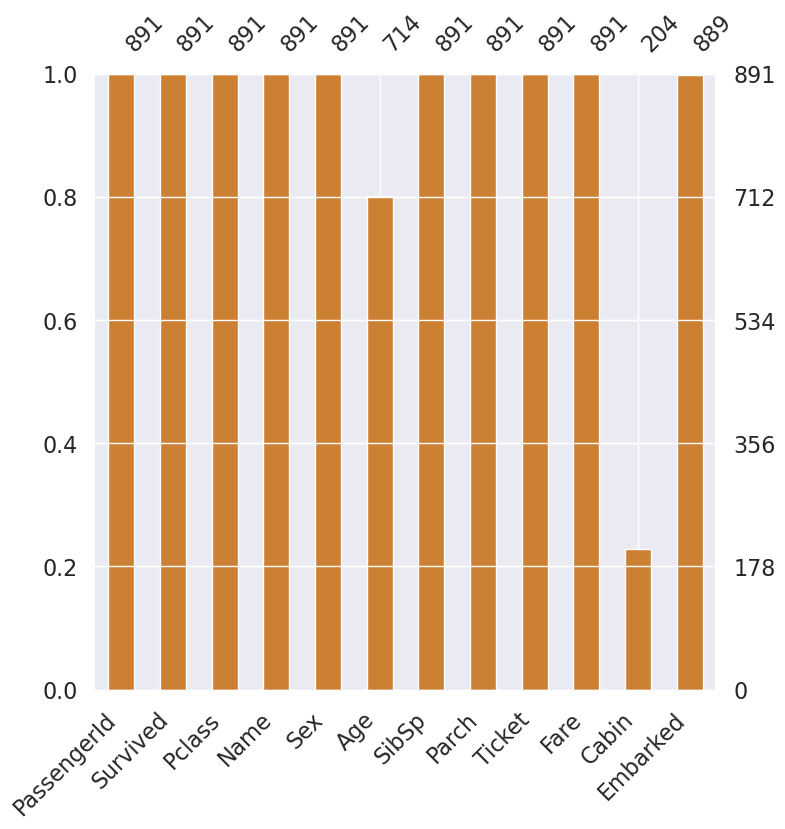

In [10]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<Axes: >

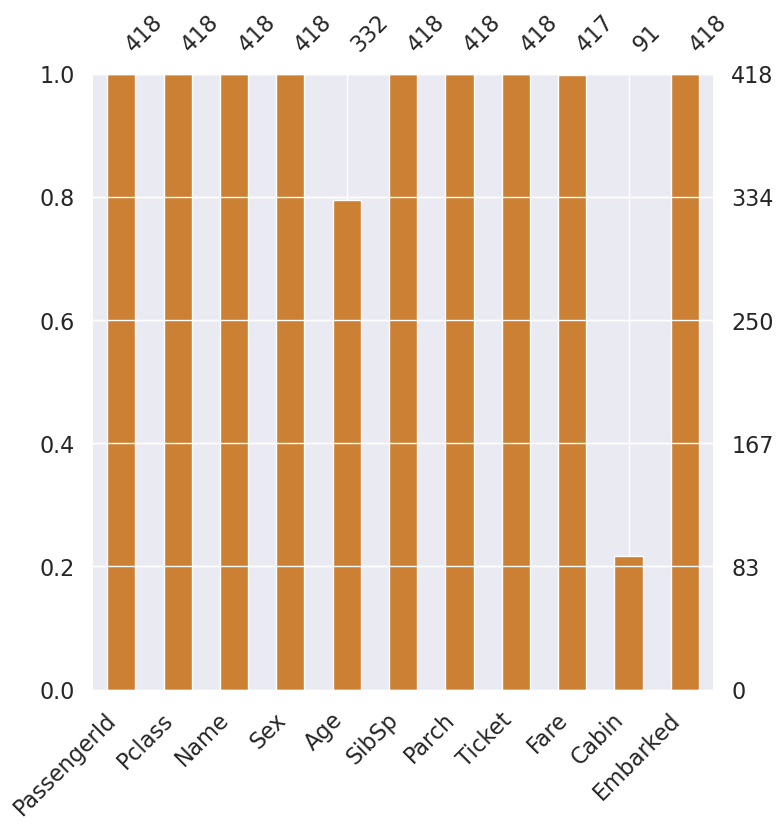

In [11]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

## 1.2 Target label 확인
- target label이 어떤 distribution을 가지고 있는지 확인해봐야 한다.
- 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있다.

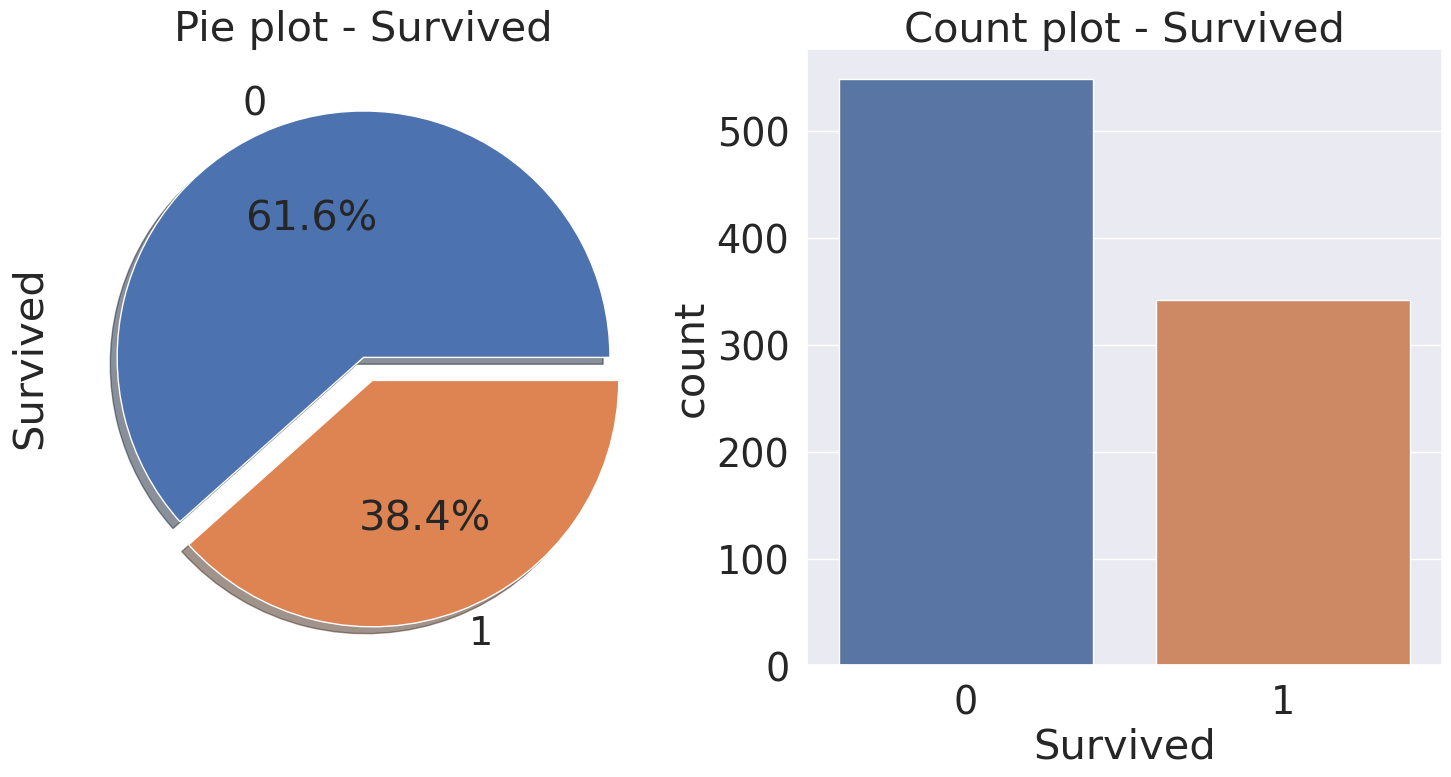

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_label('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- target label의 분포가 제법 균일하다.

# 2. Exploratory data analysis
- 데이터 분석을 통해 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요하다.

## 2.1 Pclass
- Pclass는 ordinal, 서수형 데이터. 카테고리이면서 순서가 있는 데이터 타입.
- Pclass에 따른 생존률을 확인하기 위해 groupby를 사용하면 쉽다. 또한 pivot이라는 메소드도 있다.
- 'Pclass', 'Survived'를 가져온 후, pclass로 묶는다. 그러면 각 pclass마다 0,1이 count 되는데, 이를 평균내면 각 pclass별 생존률이 나온다.
- 아래와 같이 count()를 하면 각 class에 몇명이 있는지 확인할 수 있으며, sum()을 하면 216명 중 생존한 사람의 총합을 주게 된다.

In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있습니다. class 1 이면 아래와 같습니다.


- $\frac{80}{(80+136)}\approx 0.63$

<Axes: xlabel='Pclass'>

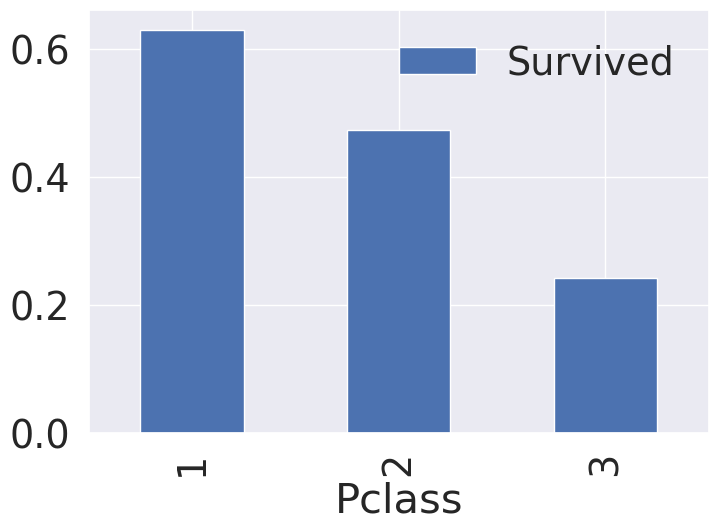

In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- Pclass가 좋을 수록 생존률이 높은 것을 확인할 수 있다.
- seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인할 수 있다.

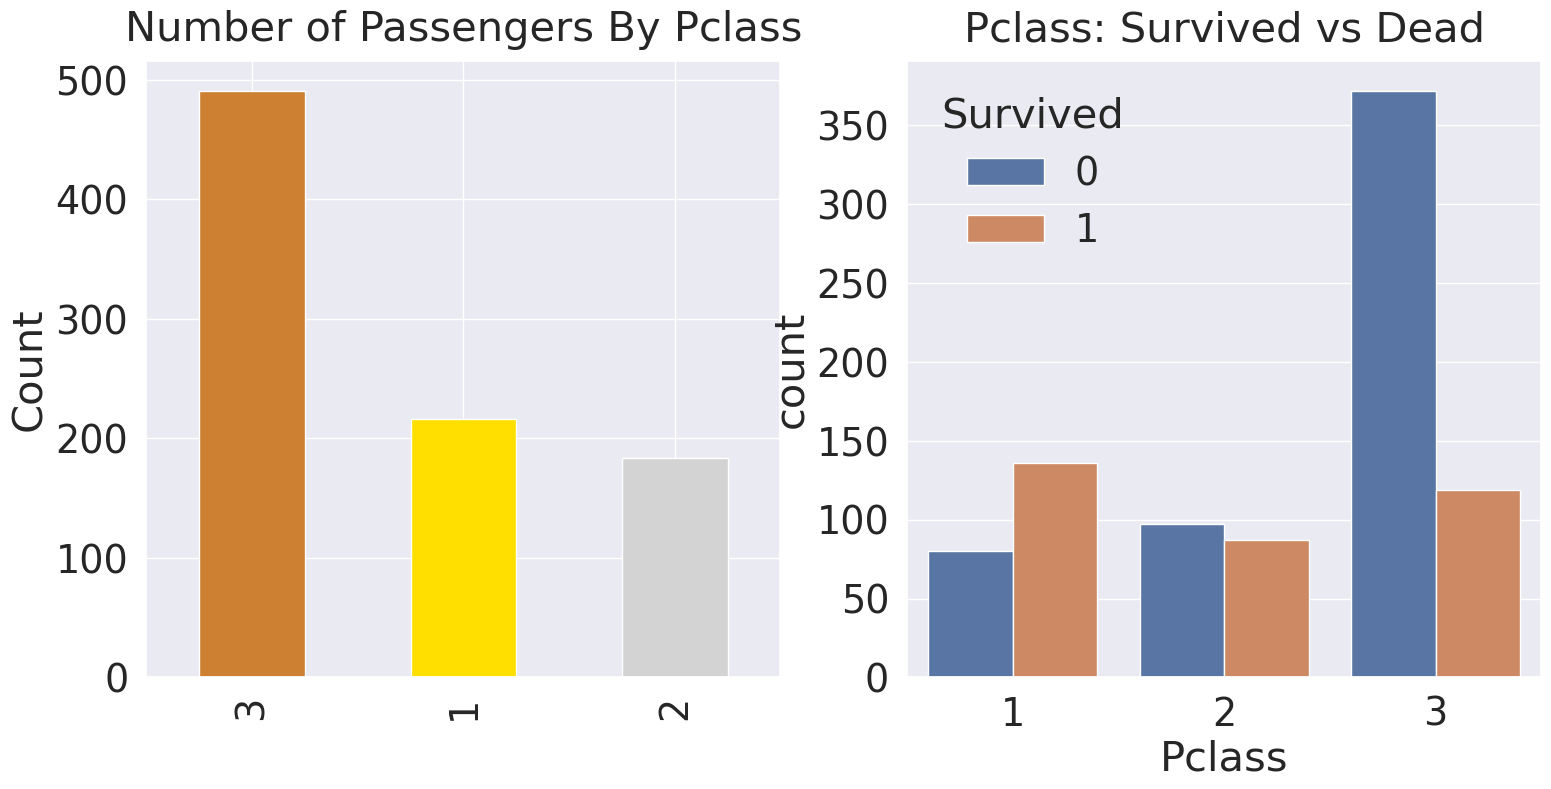

In [17]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클래스가 높을 수록 생존 확률이 높은걸 확인할 수 있다.
- 우리는 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있다.

## 2.2 Sex

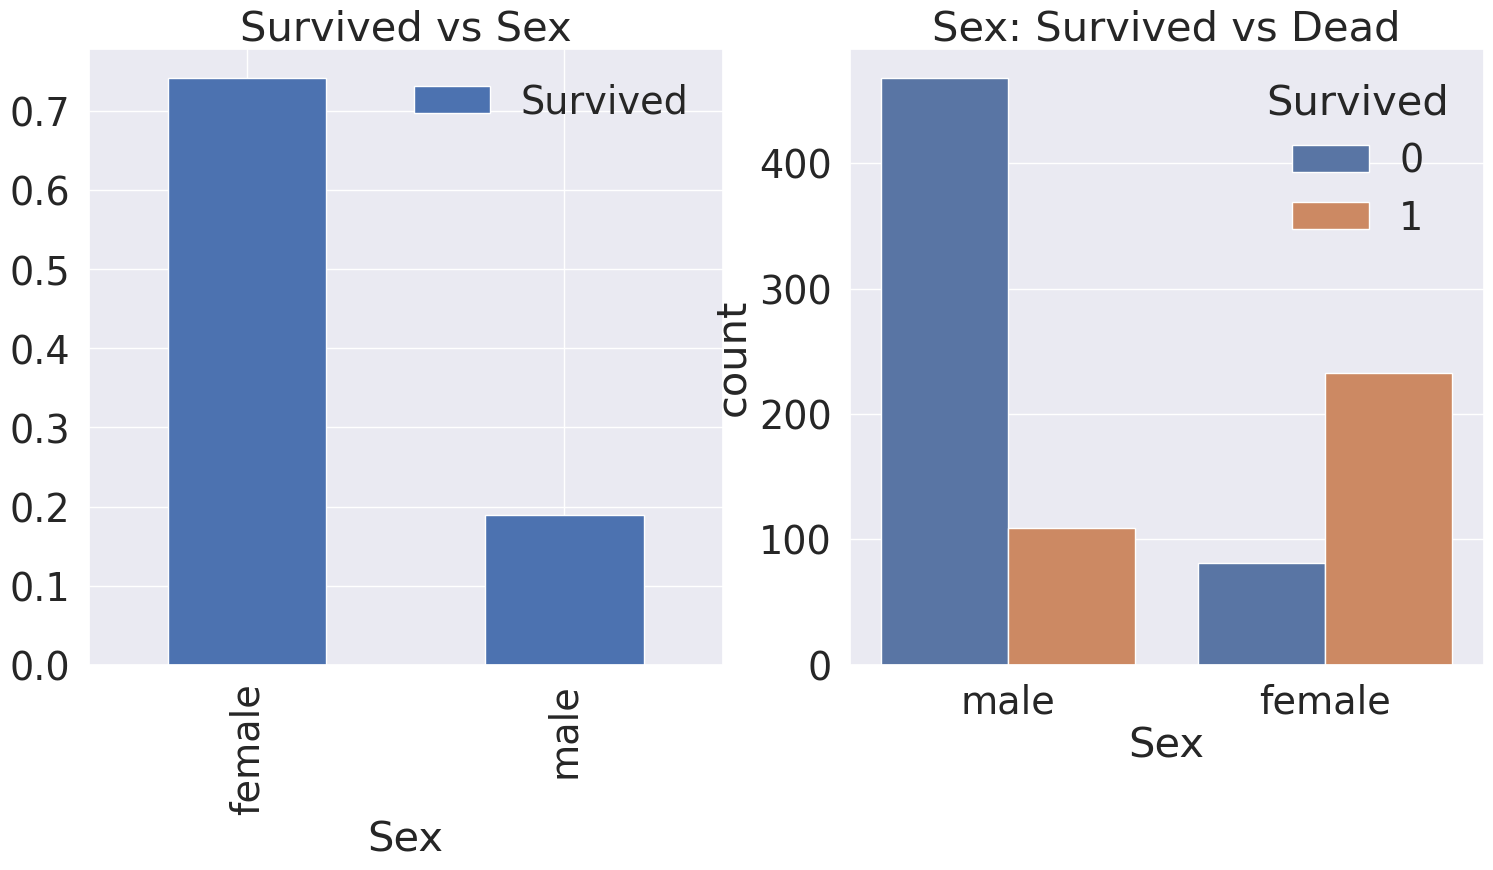

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [19]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


# 2.3 Both Sex and Pclass
- Sex, Pclass 두 가지에 관해서 생존을 알아봄
- seaborn의 factorplot을 이용하면 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

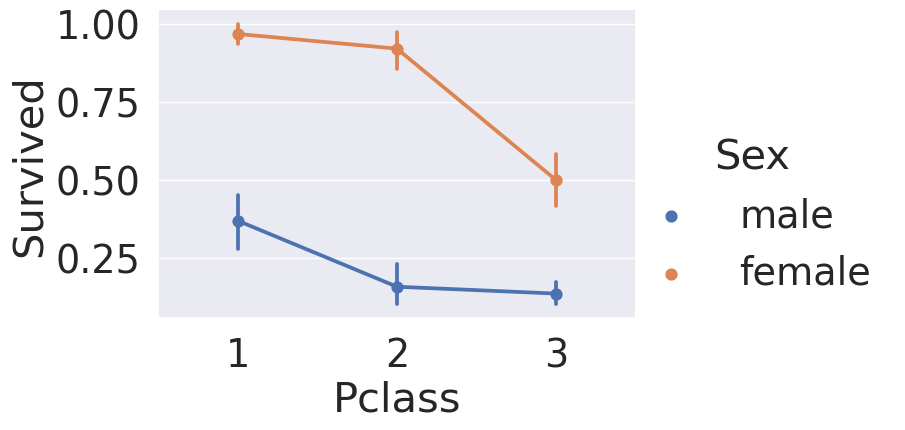

In [25]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', aspect=1.5)

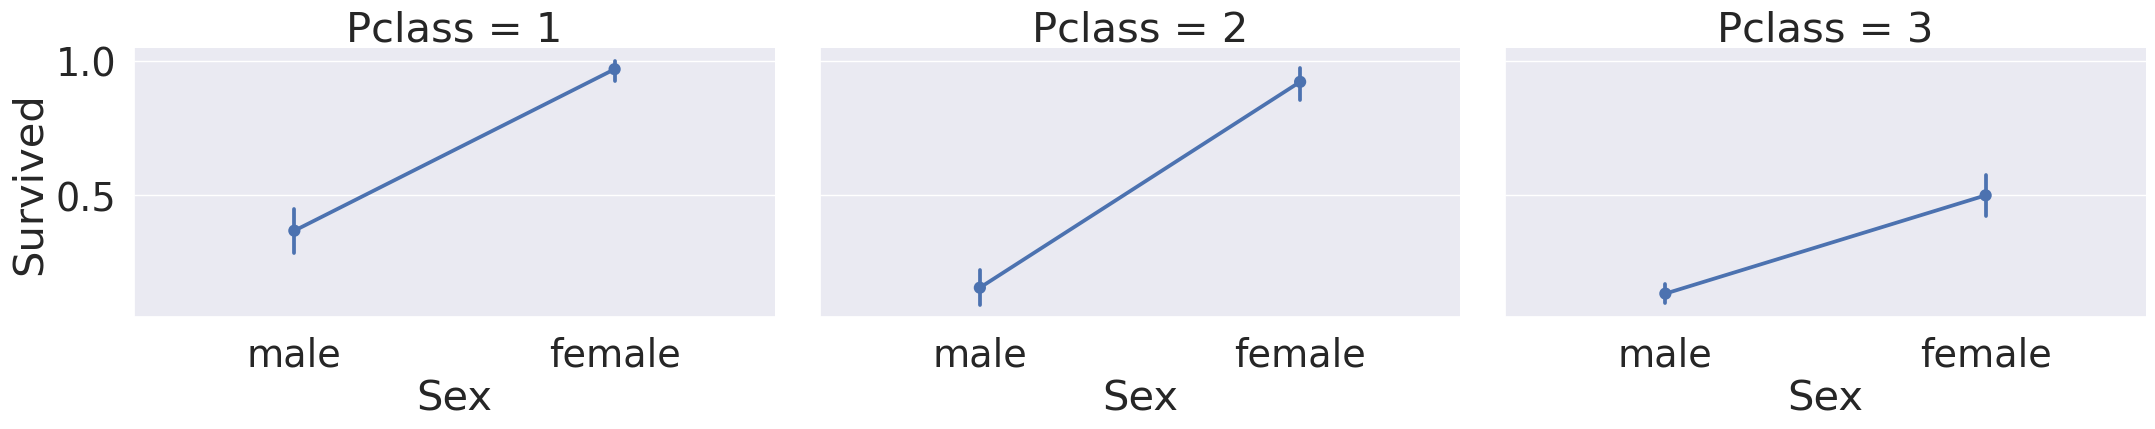

In [27]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='point', aspect=1.5)

## 2.4 Age

In [28]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


- 생존에 따른 Age의 histogram

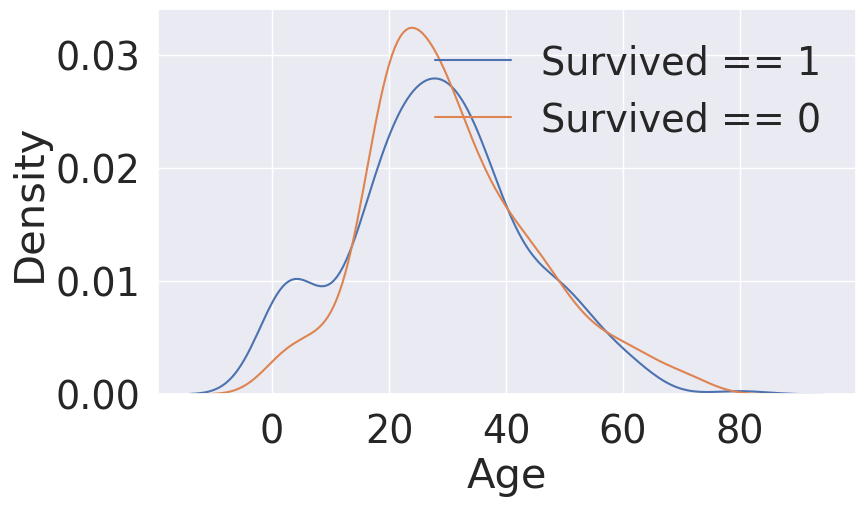

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

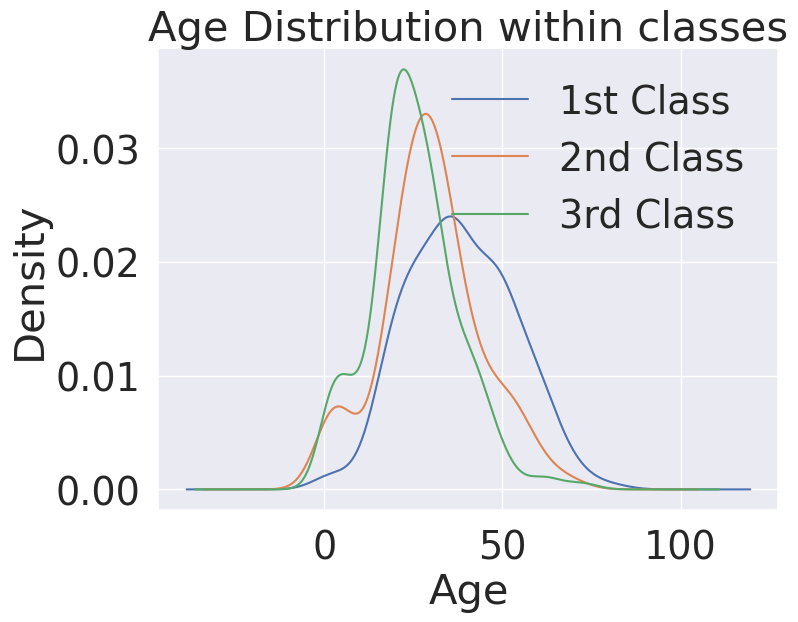

In [30]:
# Age distribution within classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- Class가 높을수록 나이 많은 사람의 비중이 큼
- 나이대의 변화에 따른 생존률의 변화

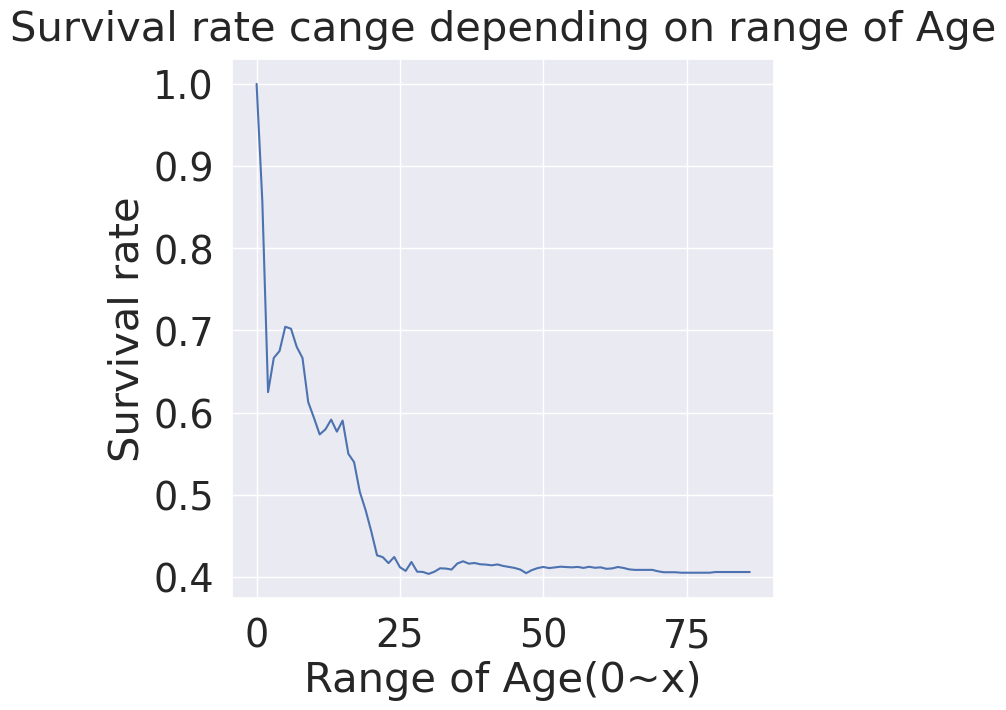

In [33]:
cummulate_survival_ratio = []
for i in range(1,88):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate cange depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

## 2.5 Pclass, Sex, Age

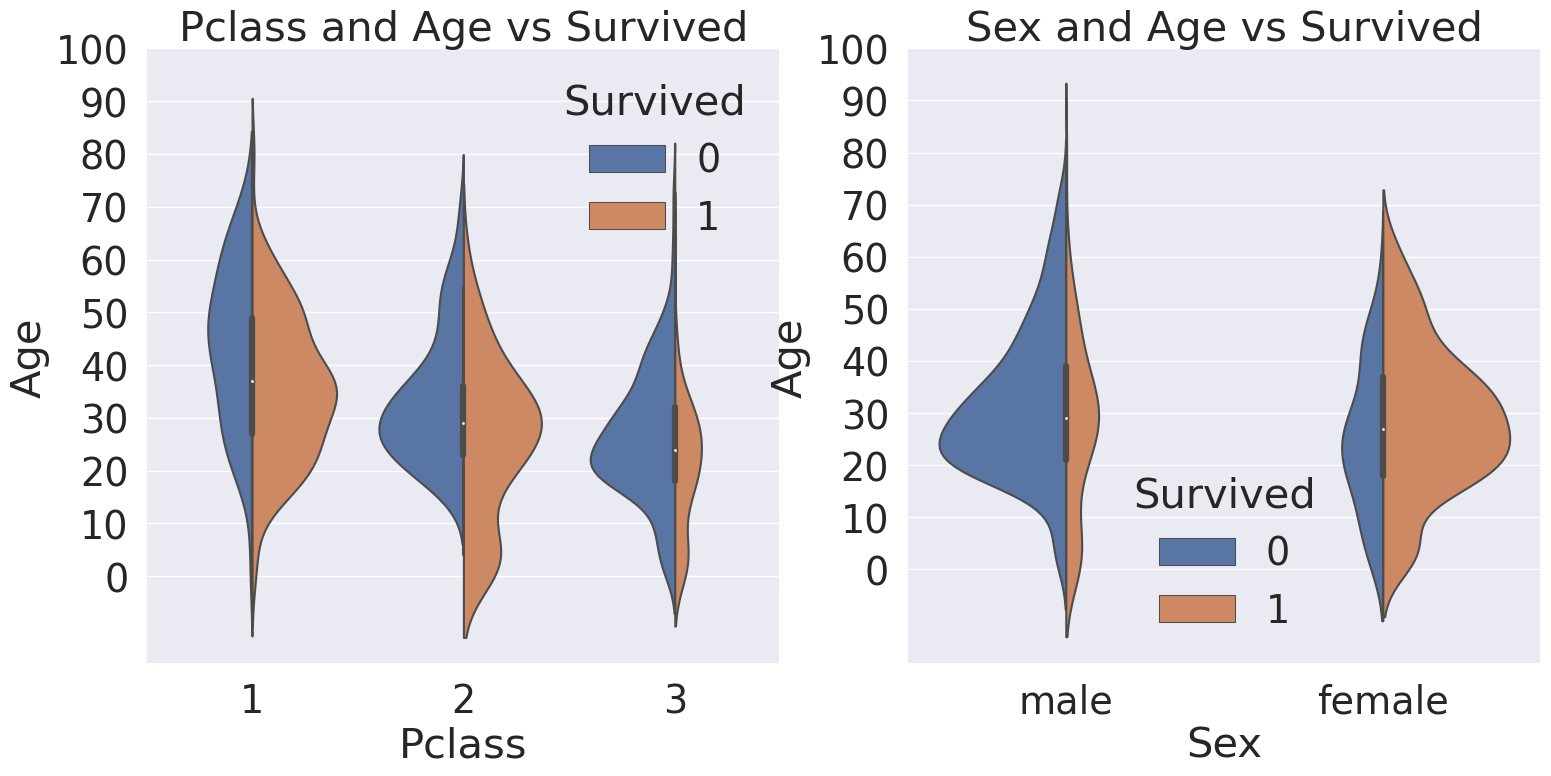

In [35]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## 2.6 Embarked

<Axes: xlabel='Embarked'>

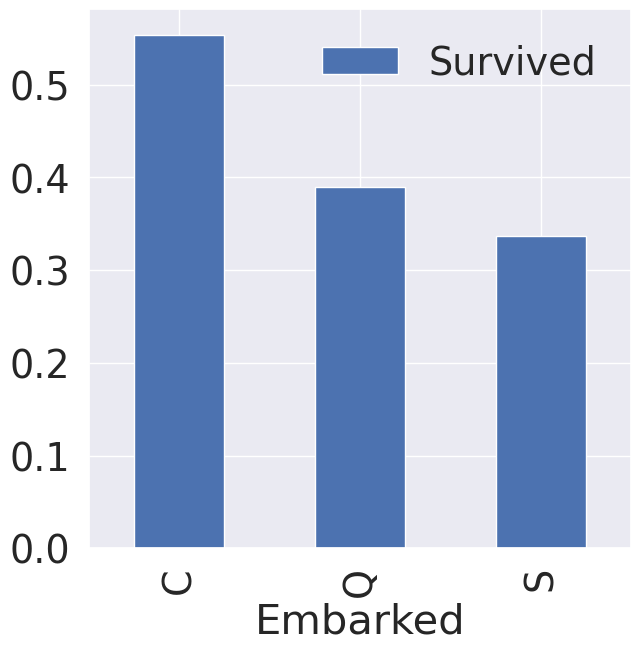

In [36]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

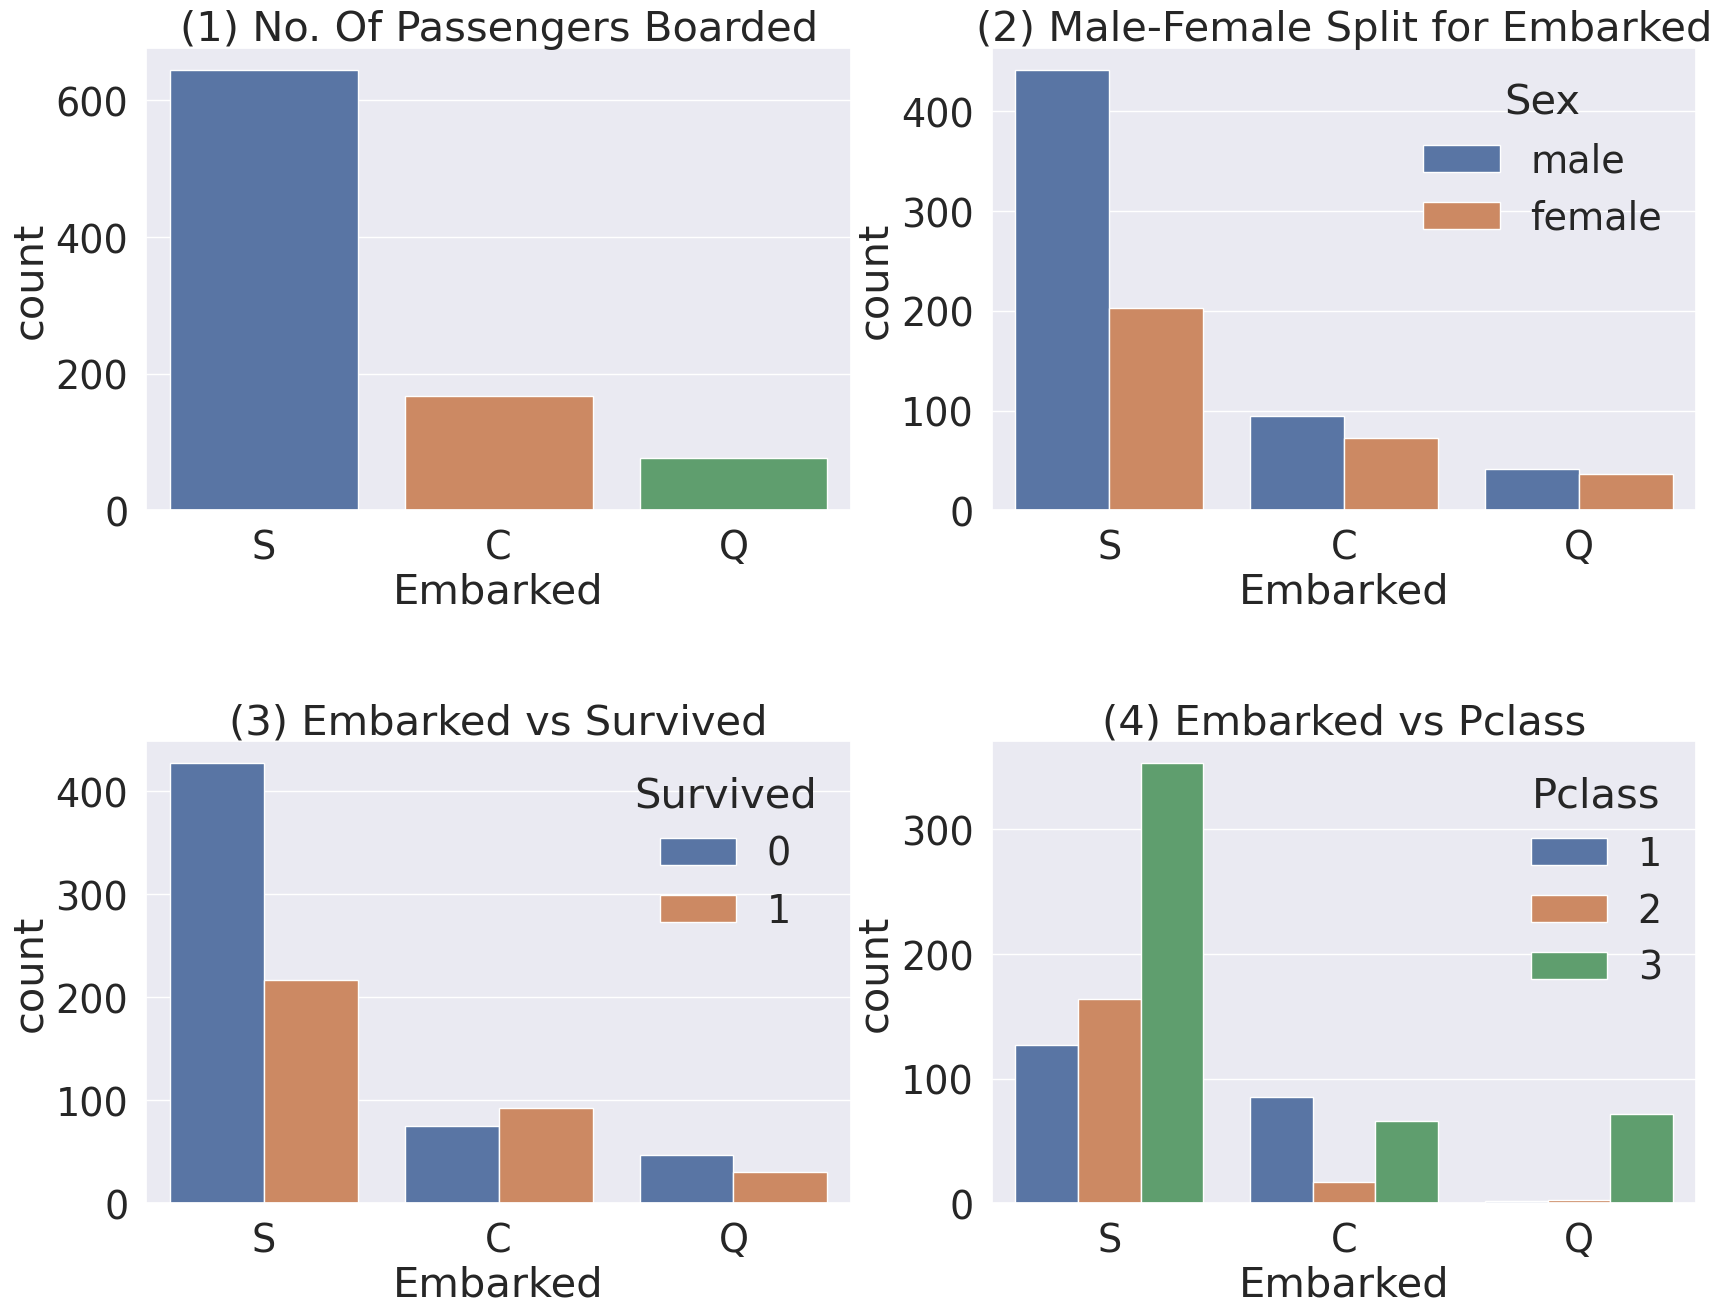

In [39]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - S에서 가장 많은 사람이 탑승
- Figure(2) - C와 Q는 남녀 비율이 비슷하고, S는 남자가 더 많다.
- Figure(3) - S는 생존확률이 많이 낮다.
- Figure(4) - C가 생존확률이 높은 이유는 클래스가 높은 사람이 많이 탔기 때문이다. S는 3rd class가 많아서 생존확률이 낮다.

## 2.7 Family - SibSp (형제 자매) + Parch (부모, 자녀)

In [40]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # +1은 자신 포함
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # +1은 자신 포함

In [41]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


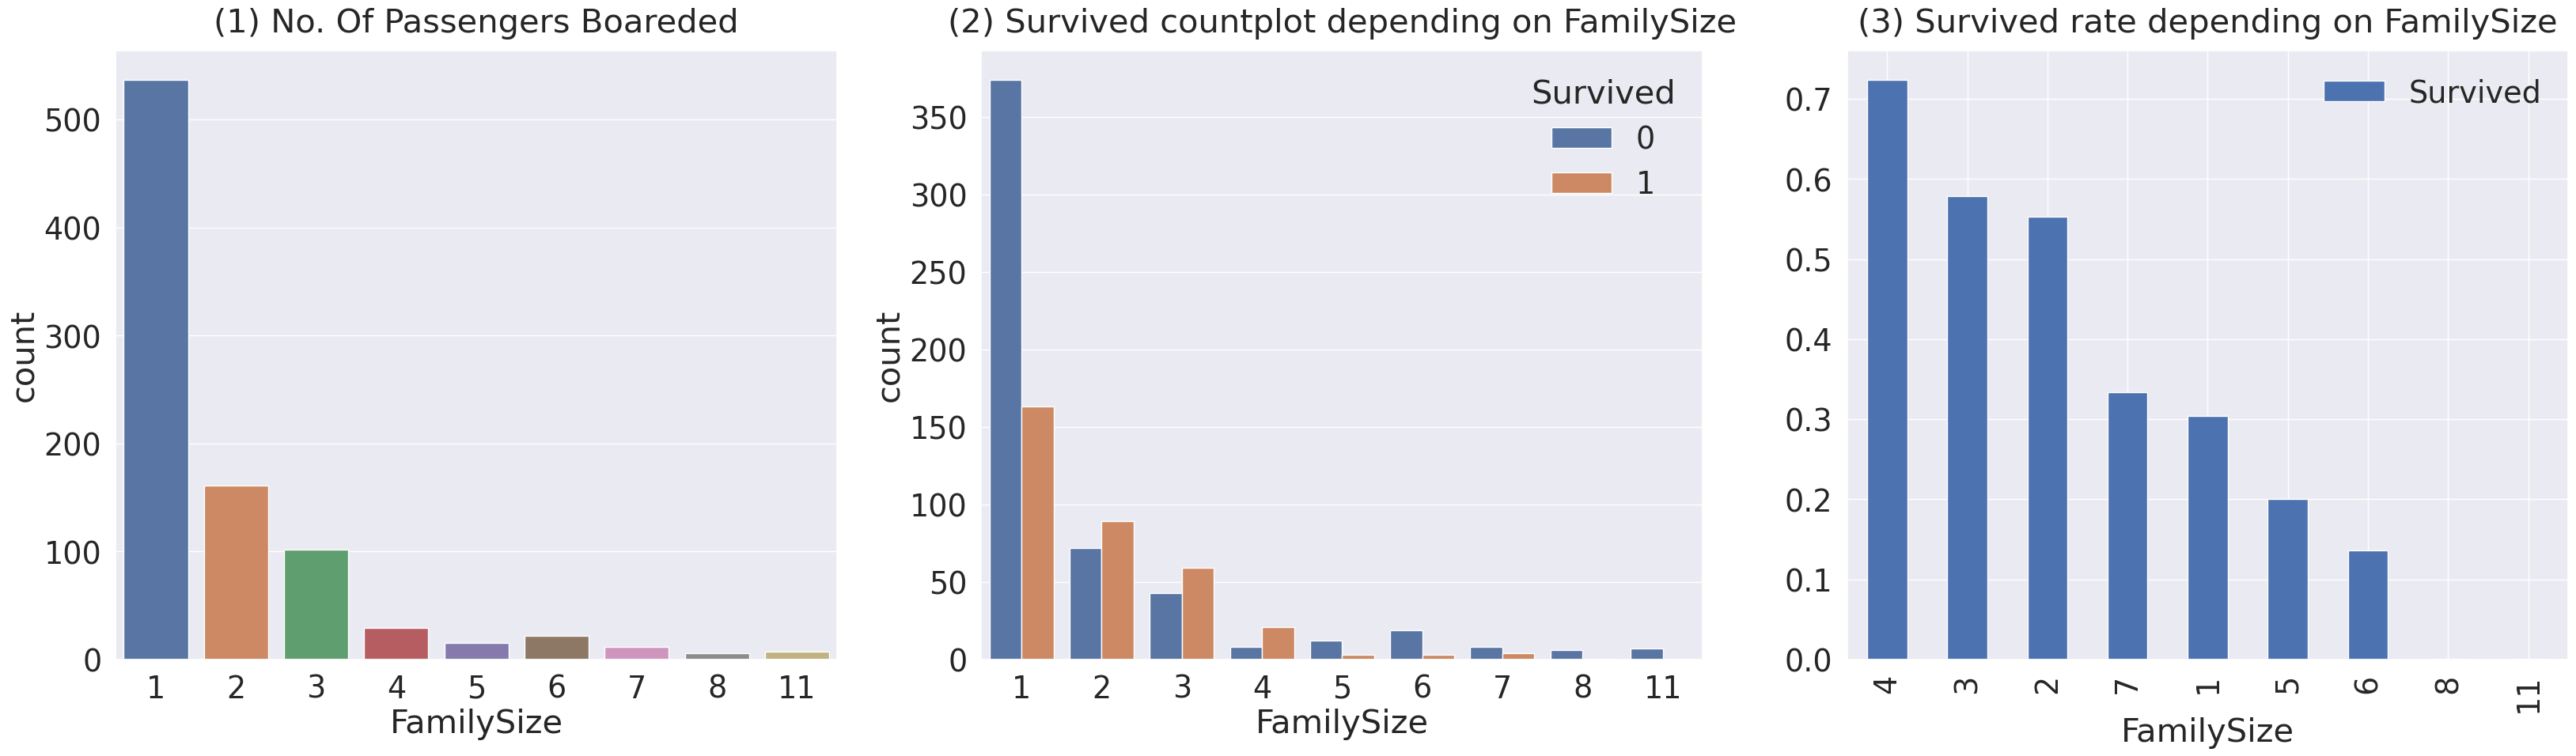

In [45]:
f, ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boareded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.8 Fare

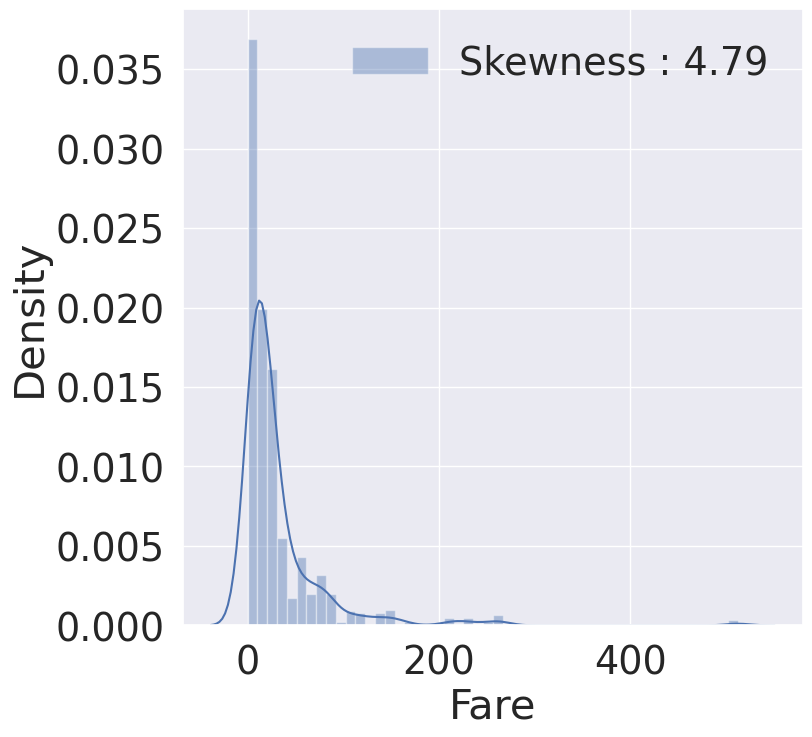

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 분포가 비대칭이다. 이대로 모델을 학습한다면 잘못 학습할 수 있다. 몇개없는 이상치에 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있다.
- 이상치의 영향을 줄이기 위해 log를 취한다.
- dataframe의 특정 열에 공통된 작업을 적용하고 싶으면 아래의 map 또는 apply를 사용하면 쉽게 적용할 수 있다.
- log는 lambda 함수를 이용해 로그를 적용하는 함수를 map에 인수로 넣어 주면 데이터에 그대로 적용된다.

In [47]:
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

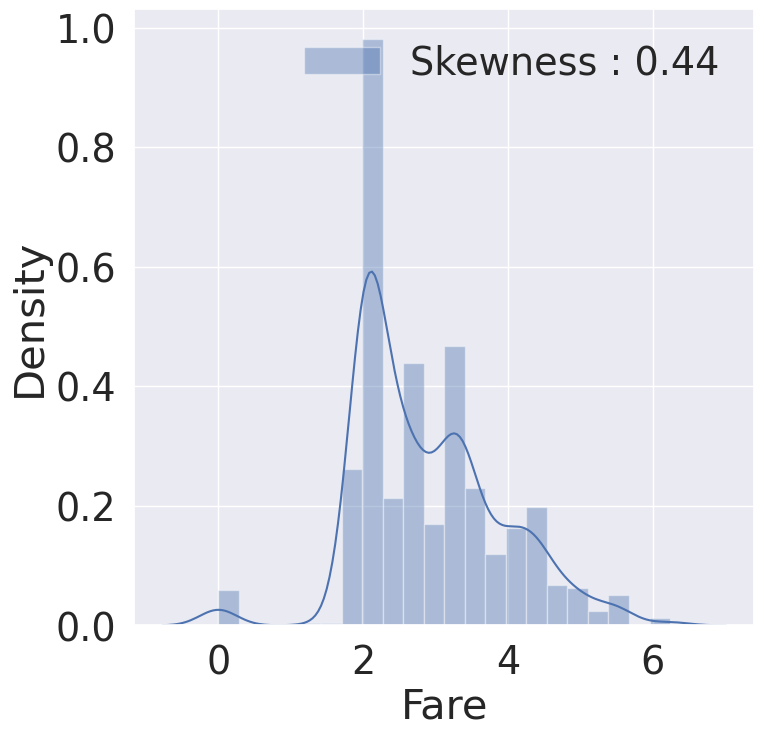

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew(), ax=ax))
g = g.legend(loc='best')

## 2.9 Cabin
- 이 feature은 NaN이 대략 80%이므로 모델에 포함시키지 않도록 한다.

In [49]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2.10 Ticket

In [50]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64